In [3]:
import pandas as pd
import numpy as np

In [4]:
import requests

In [5]:
from bs4 import BeautifulSoup

In [8]:
url = 'https://www.amazon.com/Bionix-Safestraw-Drinking-Thickened-Liquids/product-reviews/B00L3D2MY0/ref=cm_cr_getr_d_paging_btm_prev_1?ie=UTF8&reviewerType=all_reviews&pageNumber=1'
request_headers={'authority': 'images-na.ssl-images-amazon.com',
                    'method': 'GET',
                    'path': '/images/I/41Ft9AfhQ+L._RC%7C31fOrM4U5KL.js,11PLCo6zxLL.js,21kzbzVTvjL.js,41Ul1U+eUaL.js,31yCl0u2BnL.js,61W4tlTmRbL.js,41l6Ts6x3oL.js_.js?AUIClients/DesktopRemoteARPMetaAsset',
                    'scheme': 'https',
                    'accept': '*/*',
                    'sec-ch-ua': '"Chromium";v="88", "Google Chrome";v="88", ";Not A Brand";v="99"',
                    'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_13_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.96 Safari/537.36'
                }

In [9]:
response = requests.get(url,headers=request_headers)
response

<Response [200]>

In [10]:
soup = BeautifulSoup(response.content)
soup

<!DOCTYPE html>
<html class="a-no-js" data-19ax5a9jf="dingo" lang="en-us"><!-- sp:feature:head-start -->
<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>
<script type="text/javascript">var ue_t0=ue_t0||+new Date();</script>
<!-- sp:feature:cs-optimization -->
<meta content="on" http-equiv="x-dns-prefetch-control"/>
<link href="https://images-na.ssl-images-amazon.com" rel="dns-prefetch"/>
<link href="https://m.media-amazon.com" rel="dns-prefetch"/>
<link href="https://completion.amazon.com" rel="dns-prefetch"/>
<script type="text/javascript">
window.ue_ihb = (window.ue_ihb || window.ueinit || 0) + 1;
if (window.ue_ihb === 1) {

var ue_csm = window,
    ue_hob = +new Date();
(function(d){var e=d.ue=d.ue||{},f=Date.now||function(){return+new Date};e.d=function(b){return f()-(b?0:d.ue_t0)};e.stub=function(b,a){if(!b[a]){var c=[];b[a]=function(){c.push([c.slice.call(arguments),e.d(),d.ue_id])};b[a].replay=function(b){for(var a;a=c.shift();)b(a[0],a[1],a

In [12]:
review = soup.findAll("span",{'class':"a-size-base review-text review-text-content"})
review

[<span class="a-size-base review-text review-text-content" data-hook="review-body">
 <span>
   Really good for me, with difficulty swallowing. No problem with it at all, for me it is great for Atypicle Parkinson’s: PSP
 </span>
 </span>,
 <span class="a-size-base review-text review-text-content" data-hook="review-body">
 <span>
   It doesn’t work for me I have no suction my throat is the problem
 </span>
 </span>,
 <span class="a-size-base review-text review-text-content" data-hook="review-body">
 <span>
   They don’t last too long
 </span>
 </span>,
 <span class="a-size-base review-text review-text-content" data-hook="review-body">
 <span>
   It helped my sister drink water again after having a massive stroke.
 </span>
 </span>,
 <span class="a-size-base review-text review-text-content" data-hook="review-body">
 <span>
   Difficult to use.
 </span>
 </span>,
 <span class="a-size-base review-text review-text-content" data-hook="review-body">
 <span>
   This did not work for my Mom who 

In [13]:
df = []
for i in review:
    line = i.text
    line = line.strip('\n')
    df.append(["Safestraw",line])
#     print(line)
df

[['Safestraw',
  '  Really good for me, with difficulty swallowing. No problem with it at all, for me it is great for Atypicle Parkinson’s: PSP'],
 ['Safestraw',
  '  It doesn’t work for me I have no suction my throat is the problem'],
 ['Safestraw', '  They don’t last too long'],
 ['Safestraw',
  '  It helped my sister drink water again after having a massive stroke.'],
 ['Safestraw', '  Difficult to use.'],
 ['Safestraw',
  "  This did not work for my Mom who had a stroke.  The weight at the bottom kept getting stuck.  Straw didn't seat well.  Waste of money."],
 ['Safestraw',
  '  My student with autism often chickens when drinking. This has kept her from choking al together. It’s awesome! Worth the money for sure.'],
 ['Safestraw',
  '  Size not the size I expected, but the product is pretty good l.'],
 ['Safestraw',
  "  Requires too much suction. Person who would need such a device probably doesn't have the lung strength to use -- my mom didn't. Good idea tho.But the company refu

In [15]:
df = pd.DataFrame(df,columns=["Product","Review"])
df

,Product,Review
0,Safestraw,"Really good for me, with difficulty swallowi..."
1,Safestraw,It doesn’t work for me I have no suction my ...
2,Safestraw,They don’t last too long
3,Safestraw,It helped my sister drink water again after ...
4,Safestraw,Difficult to use.
5,Safestraw,This did not work for my Mom who had a strok...
6,Safestraw,My student with autism often chickens when d...
7,Safestraw,"Size not the size I expected, but the produc..."
8,Safestraw,Requires too much suction. Person who would ...
9,Safestraw,We were a little disappointed after trying t...


In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df["Review"])

In [18]:
X

<10x91 sparse matrix of type '<class 'numpy.float64'>'
	with 107 stored elements in Compressed Sparse Row format>

In [20]:
inertia=[]
for k in range(2,10):
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=25).fit(X)
    inertia.append(kmeans.inertia_)

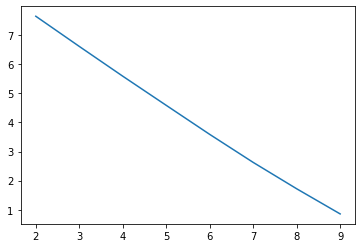

In [22]:
plt.plot(range(2,10),inertia)

In [27]:
test_k = 3
kmeans = KMeans(n_clusters=test_k, random_state=0,n_init=25).fit(X)

In [28]:
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

In [29]:
for i in range(test_k):
    print("Cluster")
    print(i)
    for ind in order_centroids[i, :10]:
        print(terms[ind])

Cluster
0
size
long
don
good
pretty
expected
product
great
atypicle
parkinson
Cluster
1
stroke
straw
kept
money
drink
water
having
helped
massive
sister
Cluster
2
use
difficult
suction
doesn
throat
problem
work
device
ship
requires


In [30]:
for i in X:
    print(vectorizer.inverse_transform(i))
    print(kmeans.predict(i))

[array(['psp', 'parkinson', 'atypicle', 'great', 'problem', 'swallowing',
       'difficulty', 'good', 'really'], dtype='<U15')]
[0]
[array(['throat', 'suction', 'work', 'doesn', 'problem'], dtype='<U15')]
[2]
[array(['long', 'don'], dtype='<U15')]
[0]
[array(['stroke', 'massive', 'having', 'water', 'drink', 'sister',
       'helped'], dtype='<U15')]
[1]
[array(['use', 'difficult'], dtype='<U15')]
[2]
[array(['money', 'waste', 'seat', 'didn', 'straw', 'stuck', 'getting',
       'kept', 'weight', 'mom', 'did', 'stroke', 'work'], dtype='<U15')]
[1]
[array(['sure', 'worth', 'awesome', 'al', 'choking', 'drinking',
       'chickens', 'autism', 'student', 'money', 'kept'], dtype='<U15')]
[1]
[array(['pretty', 'product', 'expected', 'size', 'good'], dtype='<U15')]
[0]
[array(['ship', 'didnt', 'resell', 'personal', 'bc', 'guess',
       'immediately', 'cost', 'refunded', 'company', 'tho', 'idea',
       'strength', 'lung', 'probably', 'device', 'need', 'person',
       'requires', 'didn', 'mom